# Your name: Max Kaiser

## Assignment Name: CA04 - Ensemble Models


# Program Inititialization Section
## Enter your import packages here

In [33]:
# import packages 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 

from sklearn.preprocessing import LabelEncoder # transformation: categorical to numerical variable 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score # performance metrics

# **1. Data Source and Contents**



# Data File Reading Section
## Write code to read in data from external sources here

The dataset is obtained from the Census Bureau and represents salaries of people
along with seven demographic variables. The following is a description of our dataset:

• **Number of target classes**: 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]

• **Number of attributes (Columns)**: 7


• **Number of instances (Rows)**: 48,842

In [ ]:
#read datasets

from google.colab import files
uploaded = files.upload()

#run the code and choose census_data.csv file from your local computer 

In [34]:
census_data = pd.read_csv('census_data.csv')

# **2. Data Quality Analysis**

Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.


In [10]:
# 1. Statistical Description of data (data.describe)

census_data.dtypes

census_data.describe(include=['object'])

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


In [11]:
# 2. Display number of total rows and columns of the dataset (data.shape)
census_data.shape

(48842, 11)

In [12]:
# 3. Display number of non-null values for each column (data.count)
census_data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [13]:
# 4. Display number of null values for each column (sum of data.isnull)
census_data.isnull().sum()
#no null values 

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [14]:
## 5. Display range, column, number of non-null objects of each column, datatype and memory usage 
census_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
# 6. Display Top 10 and Bottom 10 records (head and tail)

census_data.head(10)

census_data.tail(10)

## Cleansing the dataset
### Dropping of less valued columns:
1. education_num_bin does not add much value to the dataset in terms of information. The education bin labels the same information in a more readable way.Therefore, we can drop this column.

In [18]:
#skipped this step 

# Cleaning up the data

#dropping column that is not required
#census_data.drop('education_num_bin',axis=1,inplace=True)

#checking if dropped (displaying final columns)
#census_data.columns 

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_bin', 'workclass_bin', 'age_bin', 'flag',
       'y'],
      dtype='object')

###**4. Build Decision Tree Classifier Models:**

**Definition:**

Random forests is a supervised learning algorithm. It can be used both for classification and regression.Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting

###**Splitting the data & Label Encoding**

In [36]:
#define columns you want to change to category and store as variable
columns = ['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','education_num_bin','workclass_bin','age_bin']

census_data[columns] = census_data[columns].astype('category')

#check if categorical 
census_data.dtypes

hours_per_week_bin    category
occupation_bin        category
msr_bin               category
capital_gl_bin        category
race_sex_bin          category
education_num_bin     category
education_bin         category
workclass_bin         category
age_bin               category
flag                    object
y                        int64
dtype: object

In [37]:
#import and instantiate LabelEncoder (with the default parameters)
label_en = preprocessing.LabelEncoder()

census_data[columns] = census_data[columns].apply(label_en.fit_transform)

census_data.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,train,0
1,0,4,2,0,2,2,2,1,4,train,0
2,1,0,1,0,2,1,1,1,3,train,0
3,1,0,2,0,1,0,0,1,4,train,0
4,1,4,2,0,0,2,2,1,1,train,0
5,1,4,2,0,1,3,3,1,3,train,0
6,0,0,1,0,0,0,0,1,4,train,0
7,3,4,2,0,2,1,1,1,4,train,1
8,3,4,1,2,1,3,3,1,2,train,1
9,1,4,2,2,2,2,2,1,4,train,1


In [38]:
#Split the Dataset in Training and Test data 

#slice the DF using flag column 

train_df = census_data.loc[census_data.flag =='train']

train_df.shape #32561 instances , 10 columns 

#drop flag column (not useful)
train_df.drop(columns='flag',inplace=True)

train_df.shape #9 columns 

test_df =  census_data.loc[census_data.flag =='test']

test_df.shape #16281 instances, 10 columns 

test_df.drop(columns='flag',inplace=True)

test_df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(16281, 10)

In [39]:
# define X and y and split into training and test sets

X_train  = train_df.drop('y',axis=1) 
X_test = test_df.drop('y',axis=1)

y_train = train_df['y'] # the response variable we want to predict 
y_test = test_df['y']

**2. Finding Optimal Value of a key Hyper-parameter (Random Forest)**

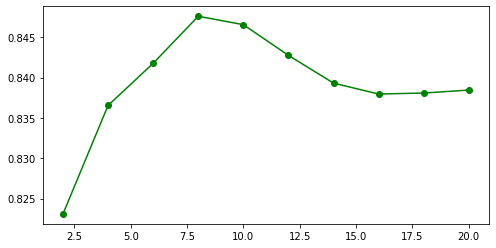

In [40]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = RandomForestClassifier(max_depth = trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color ="green",marker="o")


# why different from his graph in the instructions (same data and code)?

**2. Building a Random Forest Model**

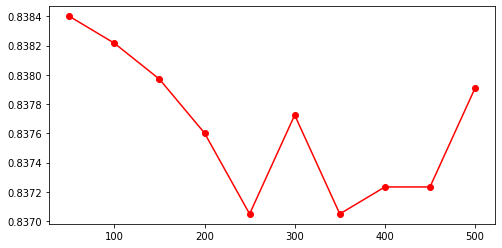

In [43]:
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    model = RandomForestClassifier(n_estimators= trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color ="red",marker="o")

# ***Answer the following questions:***

**1. Write your observations about the Classifier's behavior with respect to the number of estimators**

The results suggest that accuracy is going down with a higher number of estimators. The highest accuracy in the first model was achieved where # of estimators was 8. 

The second model had the best accuracy score at 50. 





**2. Is there an optimal value of the estimator within the given range?**

The optimal value for the range of the estimator within the given range is 8 (model 1) & 50 (model 2).





# ***AdaBoost***

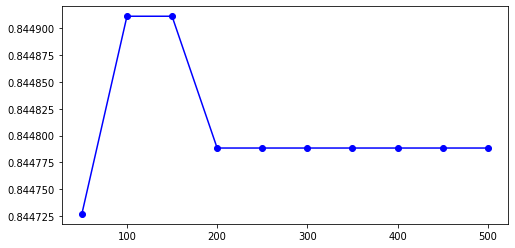

In [47]:
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    model = AdaBoostClassifier(n_estimators= trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color ="blue",marker="o")


# ***GradientBoost***

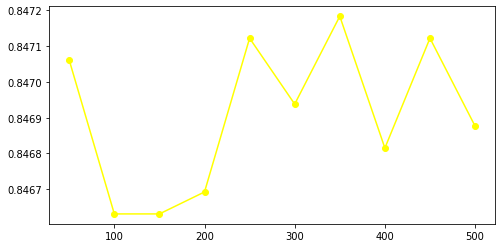

In [48]:
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    model = GradientBoostingClassifier(n_estimators= trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color ="yellow",marker="o")


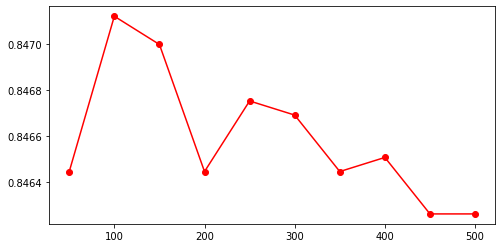

In [46]:
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    model = XGBClassifier(n_estimators= trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color ="red",marker="o")


# ***5. Compare Performance***

Keep all common Hyper-parameters same for four models (Random Forest, AdaBoost,
Gradient Boost, XGB), run them again and create a performance comparison table
within your code and print the same as follows:

In [52]:
#create comparison table

model_comparison = pd.DataFrame(columns= ['Random Forest','AdaBoost','GradientBoost','XGB'],index=['Accuracy','AUC'])

model_comparison

#empty table 
#not sure how to code/automate AUC and Accuracy for each of them. 
#create list and append 

,Random Forest,AdaBoost,GradientBoost,XGB
Accuracy,NaN,NaN,NaN,NaN
AUC,NaN,NaN,NaN,NaN
